In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import chi2

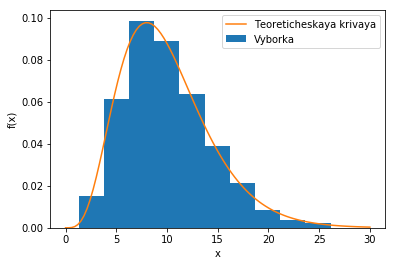

In [3]:
# Выберите ваше любимое непрерывное распределение: хи квадрат k-го порядка
# https://ru.wikipedia.org/wiki/Распределение_хи-квадрат
k = 10. 

# Сгенерируем из него выборку объёма 1000
Vyborka = chi2(k) 
obrazec = Vyborka.rvs(1000)

# Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины
x = np.linspace(0,30,100) 
plt.hist(obrazec, density=True, label='Vyborka')
PDF = Vyborka.pdf(x) 
plt.plot(x, PDF, label='Teoreticheskaya krivaya')
plt.legend(loc='best') 
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

In [4]:
#Используя информацию о среднем и дисперсии исходного распределения (из википедии
# https://ru.wikipedia.org/wiki/Распределение_хи-квадрат),посчитаем значения параметров нормальных распределений, 
# которыми, согласно ЦПТ, приближается распределение выборочных средних. 
EX = k
DX = 2*k
sd = math.sqrt(2*k)
print 'EX=', EX, ' sd=', sd, ' DX=', DX

EX= 10.0  sd= 4.472135955  DX= 20.0


mu= 10.0 , sigma= 2.0


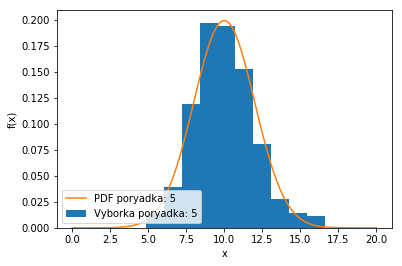


mu= 10.0 , sigma= 1.41421356237


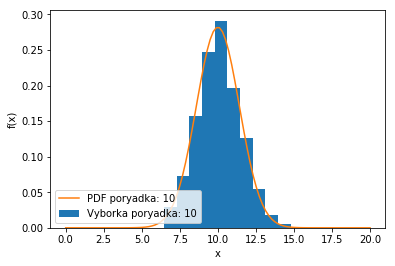


mu= 10.0 , sigma= 0.632455532034


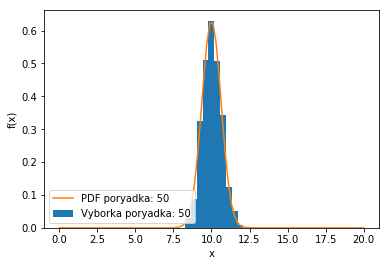

In [5]:
#Оценим распределение выборочного среднего нашей случайной величины при разных выборках.
#При значениях n (5, 10 и 50) сгенерируем 1000 выборок объёма n и 
#построим гистограммы распределений их выборочных средних.
def function1(n, mu, dispersia):
    # генерируем выборки и строим гистограммы их выборочных средних
    srednee = []
    for i in range(1000):
        srednee.append(Vyborka.rvs(n).mean()) 
    plt.hist(srednee,normed=True, label='Vyborka poryadka: '+str(n)) 
    
    #Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения
    sigma = math.sqrt(dispersia/n)
    print 'mu=' , mu, ', sigma=' , sigma
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,20,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='PDF poryadka: ' + str(n))
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(loc='lower left')
    plt.show()
    return '' 

print function1(5, EX, DX)
print function1(10, EX, DX)
print function1(50, EX, DX)

Вопросы:
1. Опишите разницу между полученными распределениями при различных значениях n. 
2. Как меняется точность аппроксимации распределения выборочных средних нормальных с ростом n?

Ответы:
1. При увеличении n, распределение средних значений начинает сходиться к матожиданию, а среднеквадратичное отклонение падает. 
2. При увеличении n точность аппроксимации распределения выборочных средних нормальных растет.